# Cyclical Learning Rate Scheduler for PyTorch

In [5]:
from mytorch.learning_rate import CyclicalLearningRate

## Concept

In his paper [1], Leslie N. Smith introduced the concept of cyclical learning rates, that is, learning rates that periodically alternative between a user-specified minimum and maximum learning rate. 

Varying the learning rate between between specified bounds, as implemented by Smith, is cheaper to compute than the nowadays popular approach using adaptive learning rates. Note that adaptive learning rate can also be combined with the concept of cyclical learning rates.

The idea behind cyclical learning rates is that while increasing the learning rate can be harmful short term it can be beneficial in the long run. Concretely, the three methods introduced by Smith (and implemented in this notebook) are

- `triangular`: The base approach, varying between a lower and an upper bound, as illustrated in the figure below
- `triangular2`: Same as triangular, but learning rate difference is cut in half at the end of each cycle. This means the learning rate difference drops after each cycle
-- `exp_range`: The learning rate varies between the minimum and maximum boundaries and each boundary value declines by an exponential factor of $gamma^{iteration}$


![](images/cyclical-lr.png)


### References


- [1] Smith, Leslie N. “[Cyclical learning rates for training neural networks](https://ieeexplore.ieee.org/abstract/document/7926641/).” Applications of Computer Vision (WACV), 2017 IEEE Winter Conference on. IEEE, 2017.

## Example: triangular learning rate

### Placeholder model

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 1)
    def forward(self, x):
        x = self.fc1(x)
        return x

model = Net()

In [43]:
num_epochs = 50
train_size = 50000
batch_size = 100
iterations_per_epoch = train_size // batch_size

# Set step size to 4 epochs (cycle length = 8 epochs):
step_size = 4 * iterations_per_epoch

collected_lr = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = CyclicalLearningRate(optimizer, step_size=step_size, max_lr=0.06)
for epoch in range(num_epochs):
    for batch in range(iterations_per_epoch):
        # train(...)
        # validate(...)
        # note that the scheduler should be called
        # after each batch (not only after each epoch)
        scheduler.step()
        
        collected_lr.append(optimizer.param_groups[0]['lr'])

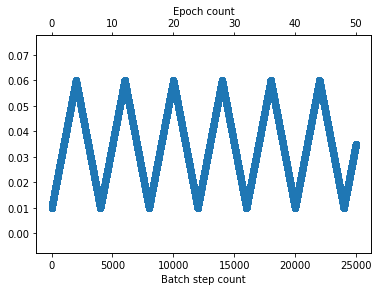

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.scatter(range(len(collected_lr)), collected_lr)
ax1.set_xlabel('Batch step count')

ax2.scatter([lr / iterations_per_epoch 
             for lr in range(len(collected_lr))], collected_lr)
ax2.set_xlabel('Epoch count')

plt.show()

## Example: `triangular2` learning rate

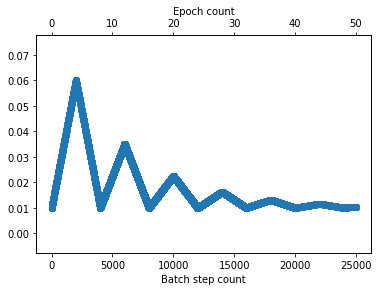

In [45]:
collected_lr = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = CyclicalLearningRate(optimizer,
                                 step_size=step_size,
                                 max_lr=0.06,
                                 mode='triangular2')
for epoch in range(num_epochs):
    for batch in range(iterations_per_epoch):
        # train(...)
        # validate(...)
        # note that the scheduler should be called
        # after each batch (not only after each epoch)
        scheduler.step()
        
        collected_lr.append(optimizer.param_groups[0]['lr'])
        
        
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.scatter(range(len(collected_lr)), collected_lr)
ax1.set_xlabel('Batch step count')

ax2.scatter([lr / iterations_per_epoch 
            for lr in range(len(collected_lr))], collected_lr)
ax2.set_xlabel('Epoch count')

plt.show()

## Example: `exp_range` learning rate

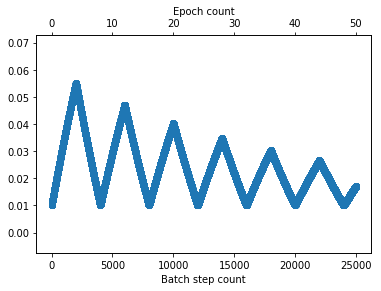

In [50]:
collected_lr = []

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = CyclicalLearningRate(optimizer,
                                 step_size=step_size,
                                 max_lr=0.06,
                                 mode='exp_range',
                                 gamma=0.99995)
for epoch in range(num_epochs):
    for batch in range(iterations_per_epoch):
        # train(...)
        # validate(...)
        # note that the scheduler should be called
        # after each batch (not only after each epoch)
        scheduler.step()
        
        collected_lr.append(optimizer.param_groups[0]['lr'])
        
        
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.scatter(range(len(collected_lr)), collected_lr)
ax1.set_xlabel('Batch step count')

ax2.scatter([lr / iterations_per_epoch 
             for lr in range(len(collected_lr))], collected_lr)
ax2.set_xlabel('Epoch count')

plt.show()